In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import datetime
import calendar

# Choose date range of daily report to analyze
DAY_BEGIN = "04-12-2020"
DAY_END = "02-01-2021"
data = {}
daterange = pd.date_range(DAY_BEGIN, DAY_END)

In [16]:
# Create dictionary of dataframes where the key is the date of the daily report
for date in daterange: 
    date = pd.to_datetime(date).strftime("%m-%d-%Y") # convert to MM-DD-YY format
    key = date
    value = pd.read_csv(r"D:\School\3rd Semester\MA213\Labs\Project\COVID-19\csse_covid_19_data\csse_covid_19_daily_reports_us\\" \
                        + date + ".csv")
    value.drop(value.index[[2, 9, 10, 13, 14, 39, 44, 52]], inplace=True) # drop US territories/misc
    value.reset_index(inplace=True, drop=True)
    data[key] = value 

In [20]:
"""
General method to find which successive months had the most testing rate increase:
Find the average testing rate for each day, then find the average of the average 
testing rate per month. Then subtract the differences between each average month's testing rate. 
"""

tst_rate_sum_monthly = []
tst_rate_sum_daily = []
month_count = int(DAY_BEGIN[:2])
sum_for_month = 0

for day in data:
    sum_for_day = data[day].loc[:, "Testing_Rate"].mean()
    
    # Prevent invalid months
    if (month_count > 12):
        month_count %= 12
        
    tst_rate_sum_daily.append(sum_for_day)
    """
    If we haven't ended the month yet, keep summing the testing rates,
    else find the average testing rate for the month and append it to
    tst_rate_sum_monthly Then reset the count for the new month
    """
    if (int(day[:2]) == month_count):
        sum_for_month += sum_for_day
    else:
        sum_for_month /= calendar.monthrange(2020, month_count)[1]
        tst_rate_sum_monthly.append(sum_for_month)
        sum_for_month = 0
        sum_for_month += sum_for_day
        month_count += 1 

In [21]:
# Calculate the differences
diff = []
for i in range(len(tst_rate_sum_monthly) - 1):
    diff.append(tst_rate_sum_monthly[i + 1] - tst_rate_sum_monthly[i])
diff

[2731.6215821197684,
 3848.5158217512585,
 5237.533700270217,
 6719.156429643552,
 7992.399888176908,
 10575.902211614582,
 16178.04807485488,
 17878.36137292329,
 16225.205244247074]

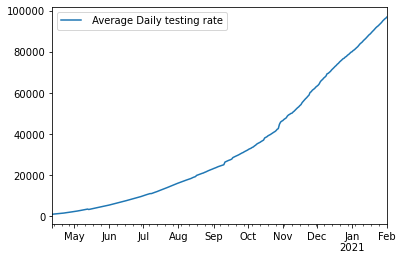

In [22]:
df = pd.DataFrame(tst_rate_sum_daily, index=daterange, columns=[" Average Daily testing rate"])
ax = df.plot()

Find new cases per day

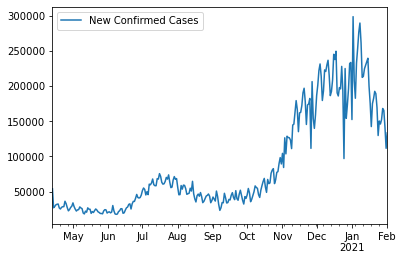

In [23]:
"""
General method: subtract cases from each successive day to give new cases per day
"""

# Create list of confirmed cases per day
daily_cases = [data[day].loc[:, "Confirmed"].sum() for day in data]

# Create list of new cases per day by subtracting cases of day i + 1
# from day i
new_cases_per_day = []

for i in range(len(daily_cases) - 1):
    new_cases_per_day.append(daily_cases[i + 1] - daily_cases[i])

df_cases = pd.DataFrame(new_cases_per_day, daterange[1:], columns=["New Confirmed Cases"])
ax_cases = df_cases.plot()

Assessing normality of confirmed cases 

((array([-2.82733045, -2.53041762, -2.3622586 , -2.24240437, -2.14809093,
         -2.06972808, -2.00233142, -1.94296505, -1.88974805, -1.8414001 ,
         -1.79700875, -1.75589983, -1.71756058, -1.6815915 , -1.64767509,
         -1.6155546 , -1.58501939, -1.55589437, -1.5280324 , -1.50130854,
         -1.4756158 , -1.45086181, -1.42696624, -1.40385877, -1.3814775 ,
         -1.35976761, -1.33868034, -1.3181721 , -1.29820377, -1.27874006,
         -1.25974909, -1.2412019 , -1.22307212, -1.20533568, -1.18797053,
         -1.17095639, -1.15427464, -1.13790807, -1.12184076, -1.10605795,
         -1.09054596, -1.07529203, -1.06028429, -1.04551163, -1.03096368,
         -1.01663072, -1.00250362, -0.98857382, -0.97483324, -0.9612743 ,
         -0.94788982, -0.93467302, -0.92161752, -0.90871724, -0.89596645,
         -0.88335969, -0.87089178, -0.8585578 , -0.84635306, -0.83427312,
         -0.8223137 , -0.81047076, -0.79874042, -0.78711896, -0.77560286,
         -0.76418871, -0.75287326, -0.

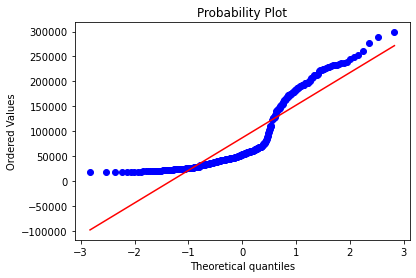

In [24]:
ax2 = plt.subplot()
stats.probplot(new_cases_per_day, plot=ax2)